In [15]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv

In [16]:
load_dotenv()

True

In [18]:
# api_key = os.getenv("GOOGLE_API_KEY")

In [19]:
model = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0.3
)

In [20]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str


In [21]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [22]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [23]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)


In [24]:
workflow = graph.compile()

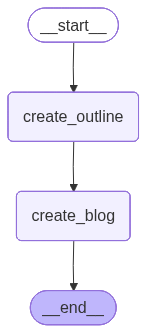

In [25]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [26]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': '**Title:** "The Rise of AI in India: Unlocking Opportunities and Challenges"\n\n**I. Introduction**\n\n* Brief overview of AI and its growing importance globally\n* India\'s position in the global AI landscape\n* Thesis statement: India is poised to become a major player in the AI sector, driven by government initiatives, technological advancements, and a growing talent pool.\n\n**II. Government Initiatives and Policies**\n\n* Overview of government initiatives:\n + National AI Portal (NAP)\n + AI for All (AIFORALL)\n + Digital India Programme\n + Make in India\n* Analysis of government policies and their impact on the AI sector\n* Discussion of the role of the government in promoting AI adoption and innovation\n\n**III. Technological Advancements and Infrastructure**\n\n* Overview of AI technologies being developed and adopted in India:\n + Machine learning\n + Natural language processing\n + Computer vision\n + Robotics\n* Discussion of th

In [27]:
print(final_state['outline'])

**Title:** "The Rise of AI in India: Unlocking Opportunities and Challenges"

**I. Introduction**

* Brief overview of AI and its growing importance globally
* India's position in the global AI landscape
* Thesis statement: India is poised to become a major player in the AI sector, driven by government initiatives, technological advancements, and a growing talent pool.

**II. Government Initiatives and Policies**

* Overview of government initiatives:
 + National AI Portal (NAP)
 + AI for All (AIFORALL)
 + Digital India Programme
 + Make in India
* Analysis of government policies and their impact on the AI sector
* Discussion of the role of the government in promoting AI adoption and innovation

**III. Technological Advancements and Infrastructure**

* Overview of AI technologies being developed and adopted in India:
 + Machine learning
 + Natural language processing
 + Computer vision
 + Robotics
* Discussion of the growth of AI infrastructure in India:
 + Data centers and cloud compu

In [28]:
print(final_state['content'])

**The Rise of AI in India: Unlocking Opportunities and Challenges**

**I. Introduction**

Artificial Intelligence (AI) has become a transformative force globally, revolutionizing industries and transforming the way we live and work. As the world becomes increasingly dependent on AI, India is poised to become a major player in the AI sector. With its growing talent pool, technological advancements, and government initiatives, India is well-positioned to unlock the opportunities and challenges presented by AI.

India's position in the global AI landscape is significant. According to a report by the International Data Corporation (IDC), India is expected to become the third-largest AI market in the world by 2025, with a projected market size of $6.7 billion. This growth is driven by the increasing adoption of AI in various sectors, including healthcare, finance, education, and manufacturing.

**II. Government Initiatives and Policies**

The Indian government has launched several initiativ

In [ ]:
from google.genai import Client

client = Client()

for model in client.models.list():
    print(model.name)


models/gemini-2.5-flash
models/gemini-2.5-pro
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-exp-1206
models/gemini-2.5-flash-preview-tts
models/gemini-2.5-pro-preview-tts
models/gemma-3-1b-it
models/gemma-3-4b-it
models/gemma-3-12b-it
models/gemma-3-27b-it
models/gemma-3n-e4b-it
models/gemma-3n-e2b-it
models/gemini-flash-latest
models/gemini-flash-lite-latest
models/gemini-pro-latest
models/gemini-2.5-flash-lite
models/gemini-2.5-flash-image
models/gemini-2.5-flash-preview-09-2025
models/gemini-2.5-flash-lite-preview-09-2025
models/gemini-3-pro-preview
models/gemini-3-flash-preview
models/gemini-3-pro-image-preview
models/nano-banana-pro-preview
models/gemini-robotics-er-1.5-preview
models/gemini-2.5-computer-use-preview-10-2025
models/deep-research-pro-preview-12-2025
models/embedding-001
models/text-embedding-004
models/gemini-embedding-001
models/aqa
models/